In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv(r'customer_data.csv')
data.head()

,cola_300ml,cola_600ml,guazi,haipai_hainorim,haipiao_haibo,redbull,haixiangcuilan,luosifen_335g,qiaqia_oatmeal,spicy_chicken_noodle,TeLunSuMilk,wangzai_milk,xiangbage_honey_chicken_wings
0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,2,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,0,0,0


# Check Missing Values

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50521 entries, 0 to 50520
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   cola_300ml                     50521 non-null  int64
 1   cola_600ml                     50521 non-null  int64
 2   guazi                          50521 non-null  int64
 3   haipai_hainorim                50521 non-null  int64
 4   haipiao_haibo                  50521 non-null  int64
 5   redbull                        50521 non-null  int64
 6   haixiangcuilan                 50521 non-null  int64
 7   luosifen_335g                  50521 non-null  int64
 8   qiaqia_oatmeal                 50521 non-null  int64
 9   spicy_chicken_noodle           50521 non-null  int64
 10  TeLunSuMilk                    50521 non-null  int64
 11  wangzai_milk                   50521 non-null  int64
 12  xiangbage_honey_chicken_wings  50521 non-null  int64
dtypes: int64(13)
mem

> no missing values

# Check for outliers

In [ ]:
data.describe().T

> No need to standardize the data because of the uniformity of the scale

# Model fitting (using KMeans)

In [5]:
X = data

For n_clusters = 2 The average silhouette_score is : 0.2886790301129449


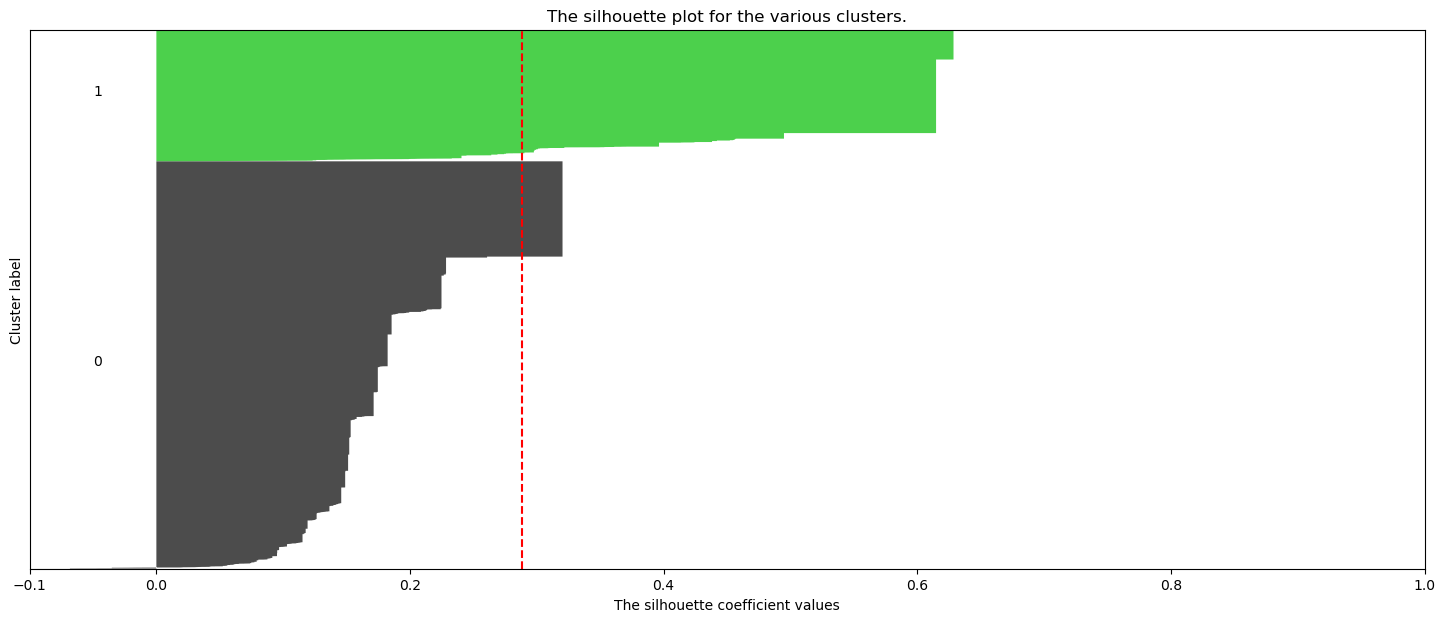

For n_clusters = 3 The average silhouette_score is : 0.3598299991043428


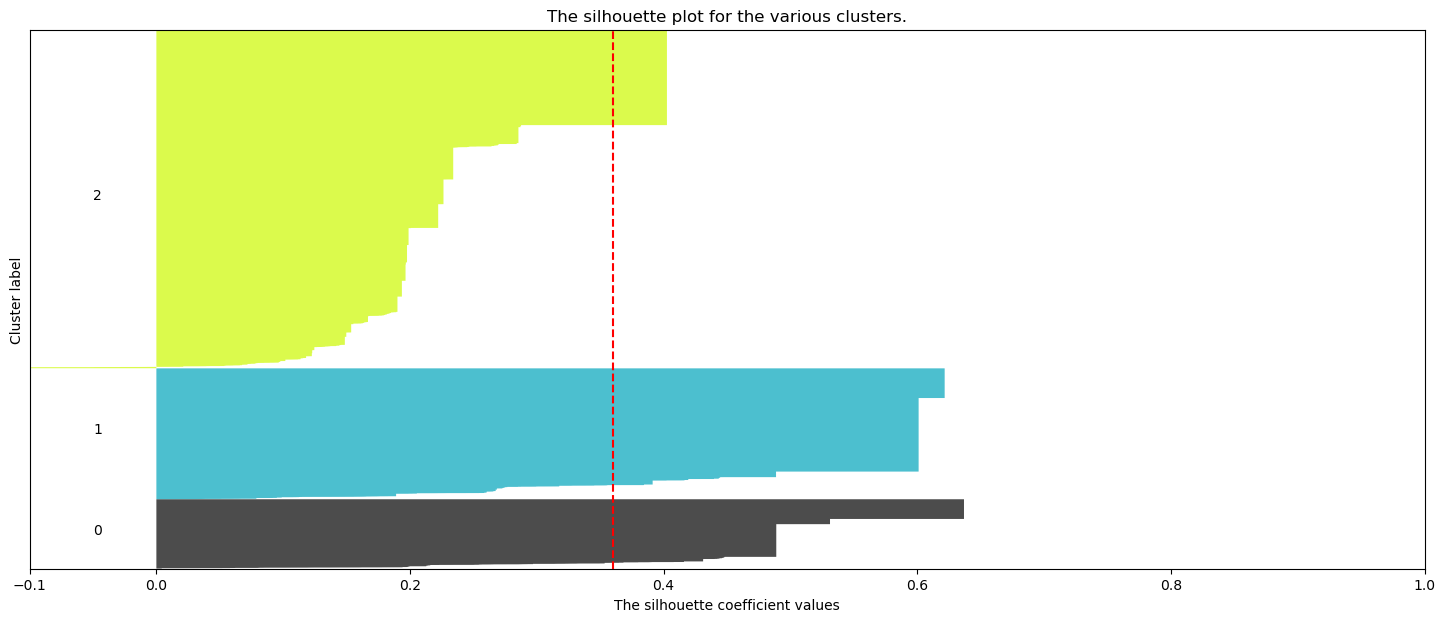

For n_clusters = 4 The average silhouette_score is : 0.38873947429702593


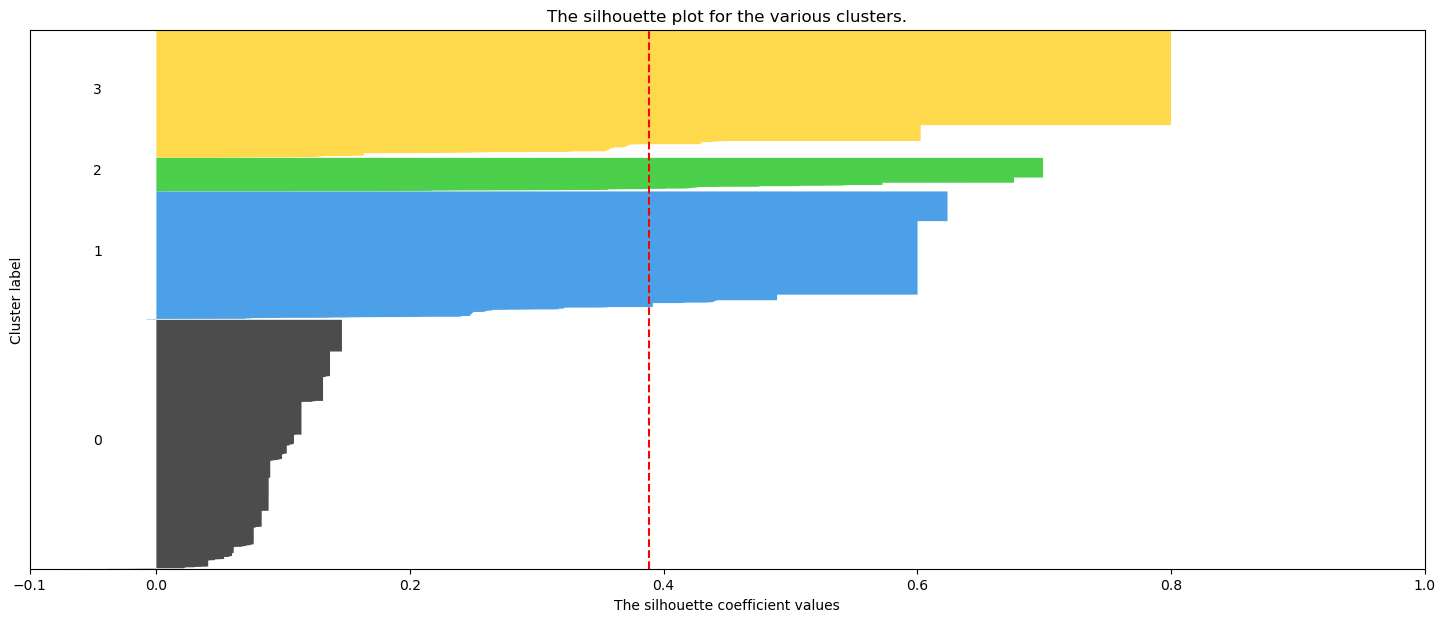

For n_clusters = 5 The average silhouette_score is : 0.452951343558816


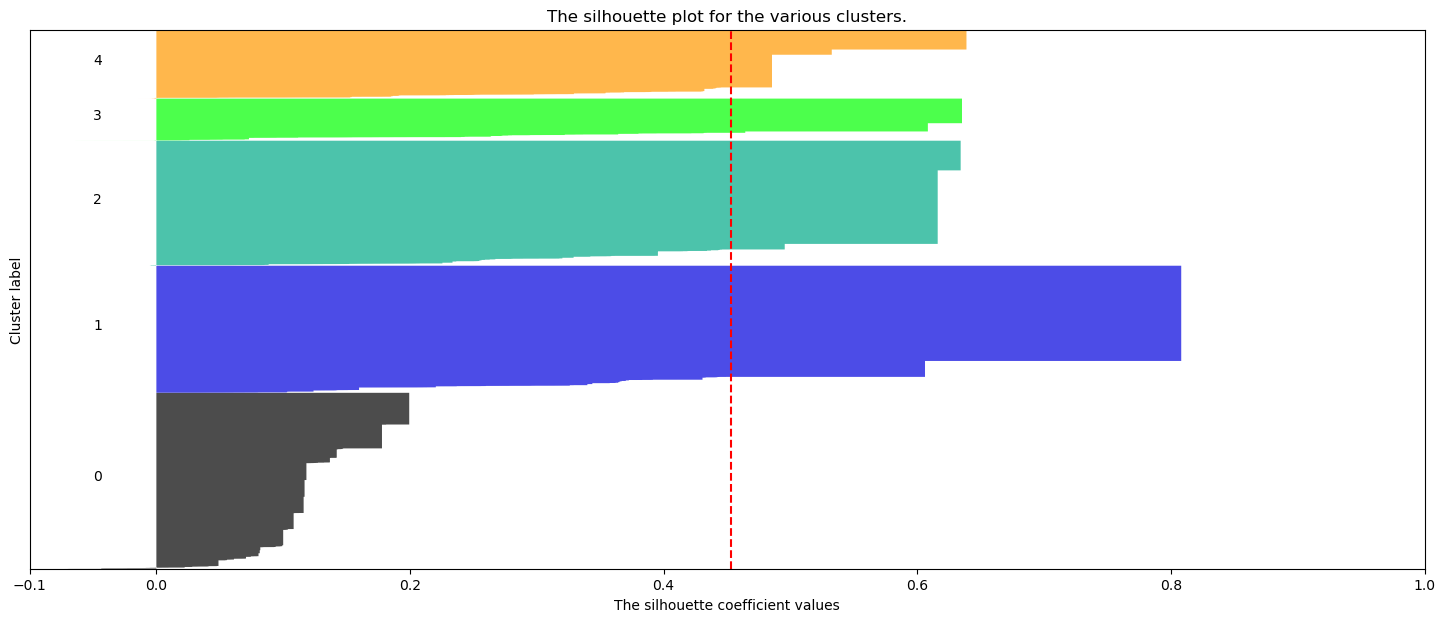

For n_clusters = 6 The average silhouette_score is : 0.47594272970711454


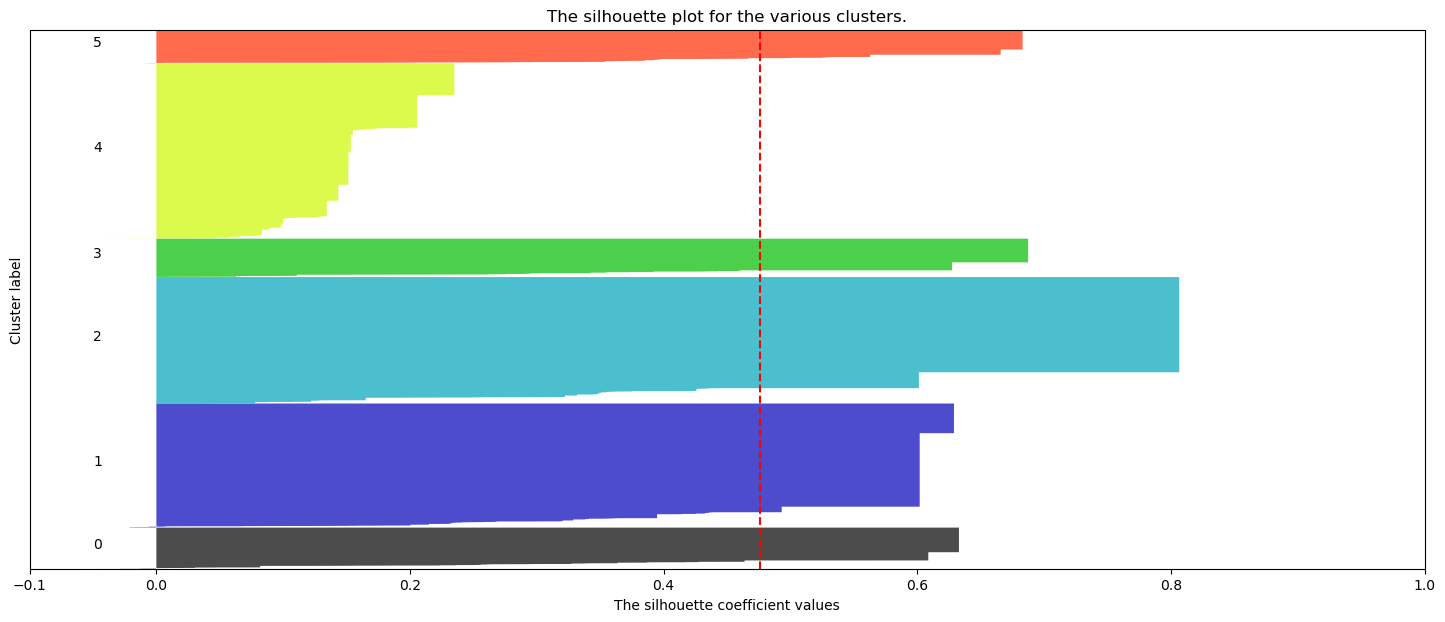

For n_clusters = 7 The average silhouette_score is : 0.45212595227750113


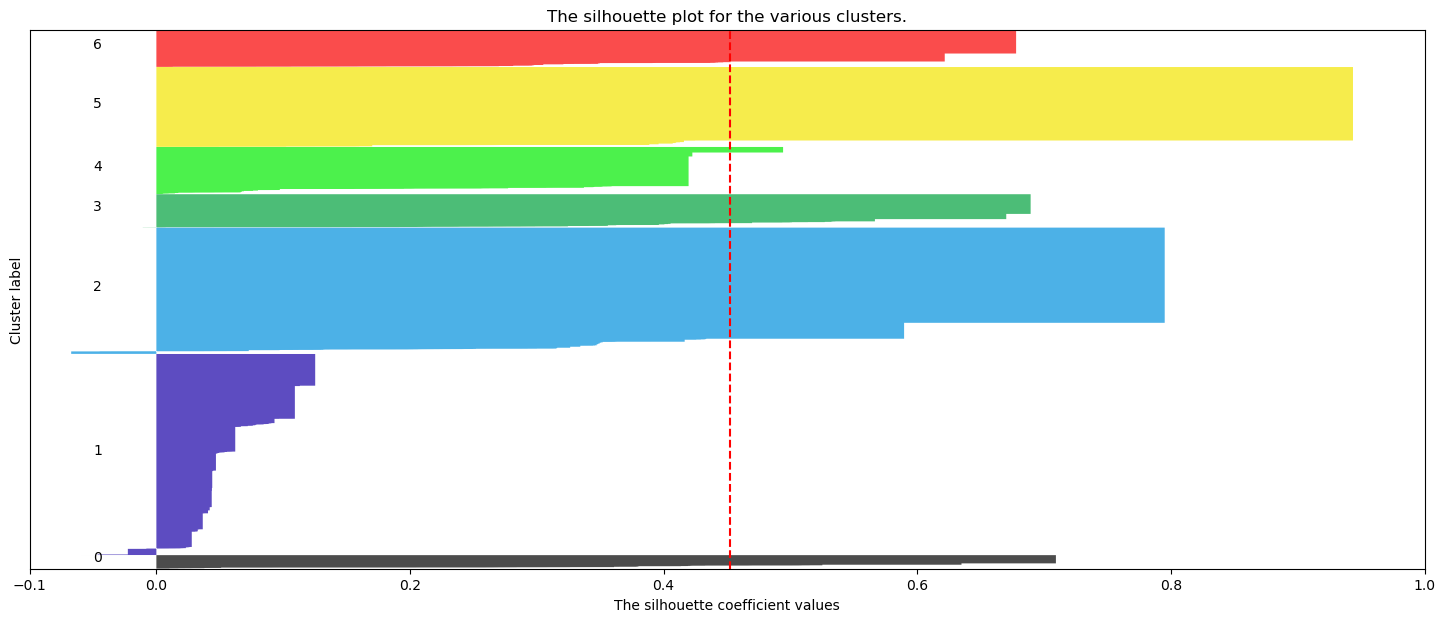

In [6]:
# Determine the number of clusters
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
for n_clusters in [2,3,4,5,6,7]:     
    n_clusters = n_clusters
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, X.shape[0] + (n_clusters + 1) * 10])   
    clusterer = KMeans(n_clusters=n_clusters, random_state=10).fit(X)
    cluster_labels = clusterer.labels_
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color = cm.nipy_spectral(float(i)/n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper)
                          ,ith_cluster_silhouette_values
                          ,facecolor=color
                          ,alpha=0.7
                         )
        ax1.text(-0.05
                 , y_lower + 0.5 * size_cluster_i
                 , str(i))
        y_lower = y_upper + 10
    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    plt.show()

> 根据轮廓系数，分6簇的平均轮廓系数最高，但要想分别对6类消费者进行精准营销所需要的成本偏高。我们退而求其次选择分3簇，分类效果相比6簇并没有明显下降，还节省了一倍的成本，并且通过观察轮廓系数图，发现每簇的轮廓系数都对总平均轮廓系数的提升有正向作用。
Based on the Silhouette Coefficient, clustering into 6 groups yields the highest average silhouette score. However, considering the high cost associated with precisely marketing to each of the 6 tpyes of consumers, we decide to divide the whole customers into 3 groups. This choice does not significantly diminish the classification effectiveness compared to 6 clusters, while it saves half the cost. Additionally, by observing the silhouette score graph, we find that each cluster positively contributes to the overall average silhouette score.

In [7]:
# n_cluster = 3
kmeans = KMeans(n_clusters = 3)
kmeans.fit(X)
X['cluster'] = kmeans.labels_
centers = []
for i in X.cluster.unique():
    centers.append(X.loc[X.cluster == i,:].mean())
centers = pd.DataFrame(centers)
centers.head()

,cola_300ml,cola_600ml,guazi,haipai_hainorim,haipiao_haibo,redbull,haixiangcuilan,luosifen_335g,qiaqia_oatmeal,spicy_chicken_noodle,TeLunSuMilk,wangzai_milk,xiangbage_honey_chicken_wings,cluster
0,0.167717,0.445628,0.139018,0.080078,0.075668,0.002552,0.067257,0.082315,0.001796,0.057239,0.019594,0.151493,0.004568,0.0
1,0.037737,0.042383,0.012063,0.010025,0.004890,1.521966,0.006357,0.007254,0.000000,0.004483,0.001712,0.036515,0.012715,1.0
2,0.017671,0.026429,0.022895,0.016288,0.010449,0.022741,0.011371,0.013522,0.000000,0.006915,0.001076,0.019514,1.729410,2.0


In [33]:
centers.to_csv('centers.csv', index=False)

## 结论：
在对客户分群后，这些结果可以为我们制定营销策略提供数据支撑。营销策略建议：
对第一类消费者：该类消费者有很强的购买乡巴佬鸡翅的欲望，但是对某些商品如火鸡面，螺狮粉，海苔卷没有很强的消费冲动，因此商家可以针对该类人群，将乡巴佬鸡翅和这些销量不高的零食类产品捆绑销售，提高低销量商品的销量。同时也可单独对乡巴佬鸡翅进行促销，提升该类顾客满意度，从而增强品牌忠诚度。
对第二类消费者：这类消费者没有特别明显的偏好，他们对大部分零食都比较中立，只是稍微偏爱可乐。这类人可能是不太挑食的普通消费者，他们不太关注零食的品牌和特色，而更看重零食的方便性和实惠性。零食店可以针对这类人推出一些常见的零食组合，比如可乐 +薯片、可乐+海苔等，或者提供一些优惠券或积分活动，吸引他们多消费。
对第三类消费者：该类消费者更倾向与购买红牛，可乐，旺仔牛奶等饮品。商家可以进一步调研各种饮品不同口味的销量，出售更多的热门口味饮品。或者限时举办饮品“买一赠一”活动。
除此之外，所有种类的消费者都不太倾向于购买每日坚果和特仑苏牛奶。商家可以考虑减少这类商品的库存，避免过剩。

## Conclusion:
After segmenting customers, these results can provide data support for formulating marketing strategies. Suggestions for marketing strategies include:

For the first type of consumer: This group shows a strong desire to purchase Xiangbalao chicken wings but has less impulse to buy certain snacks like spicy chicken noodles, Luosifen, and seaweed rolls. Therefore, merchants can target this group by bundling Xiangbalao chicken wings with these lower-selling snack items to boost sales. Additionally, running promotions solely on Xiangbalao chicken wings can enhance customer satisfaction and strengthen brand loyalty.

For the second type of consumer: These consumers do not have a distinct preference; they are fairly neutral towards most snacks but slightly favor cola. They might be general consumers who are not very picky and focus more on the convenience and affordability of snacks. Snack stores can cater to this group by offering common snack combos, such as cola + chips, cola + seaweed, etc., or by providing coupons or points programs to encourage more purchases.

For the third type of consumer: This group tends to buy beverages like Red Bull, cola, and Wangzai milk. Merchants can further research the sales of various beverage flavors and sell more popular flavors. They can also host limited-time "buy one get one free" beverage promotions.

Additionally, all types of consumers show little inclination to buy daily nuts and Telunsu milk. Merchants might consider reducing the inventory of these products to avoid surplus.